In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import json
from firebase import firebase
from firebase_admin import credentials, initialize_app, storage,firestore
# Init firebase with your credentials
cred = credentials.Certificate(r"serviceAccountKey.json")
try:
    initialize_app(cred, {'storageBucket': 'stock-data-fc41e.appspot.com'})
except:
    print("already initialize firebased app")
firebase = firebase.FirebaseApplication('https://stock-data-fc41e-default-rtdb.firebaseio.com/', None)
%matplotlib inline

In [2]:
result = firebase.get('/Analysis/', '')
data = json.dumps(result)
resp = json.loads(data)
finalz=resp['ed']
finaly=resp['em']
finalx=resp['ey']
finalr=resp['sd']
finalq=resp['sm']
finalp=resp['sy']
x=int(finalx)
y=int(finaly)
z=int(finalz)
p=int(finalp)
q=int(finalq)
r=int(finalr)

In [3]:
start= datetime.datetime(p,q,r)
end= datetime.datetime(x,y,z)

In [4]:
result = firebase.get('/Stocks/', '')
data = json.dumps(result)
resp = json.loads(data)
finalb=resp['s1']
finalc=resp['s2']
finald=resp['s3']



In [5]:
stock1=web.DataReader(finalb,'yahoo',start,end)
stock2=web.DataReader(finalc,'yahoo',start,end)
stock3=web.DataReader(finald,'yahoo',start,end)

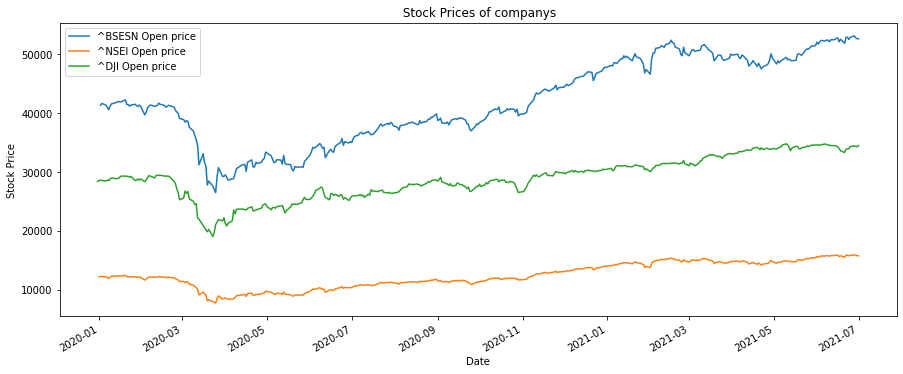

In [6]:
#open prices

stock1['Open'].plot(label=finalb +' Open price',figsize=(15,6))
stock2['Open'].plot(label=finalc+' Open price')
stock3['Open'].plot(label=finald+' Open price')
plt.title(' Stock Prices of companys')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig("openprice.jpg")

In [7]:

# Put your local file path 
fileName = r"openprice.jpg"
bucket = storage.bucket()
blob = bucket.blob("openprice")
blob.upload_from_filename(fileName)

# Put your local file path 
fileName = r"openprice.jpg"
bucket = storage.bucket()

blob = bucket.blob("openprice")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()

print("your file url", blob.public_url)


your file url https://storage.googleapis.com/stock-data-fc41e.appspot.com/openprice1


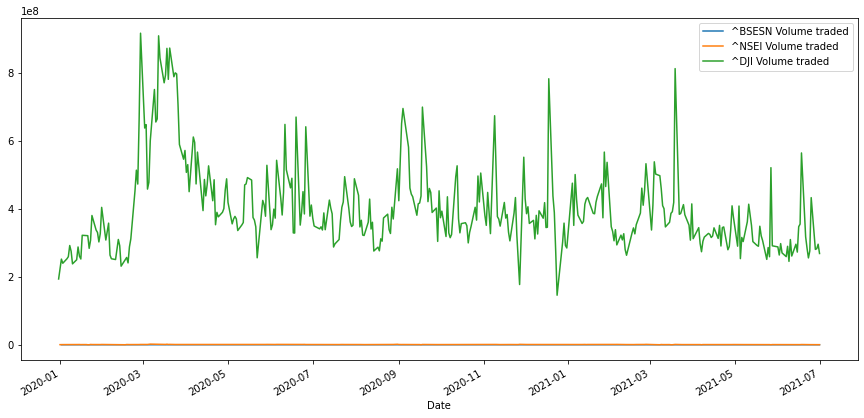

In [8]:
#volume traded &interpretations
stock1['Volume'].plot(label= finalb +' Volume traded',figsize=(15,7))
stock2['Volume'].plot(label=finalc +' Volume traded')
stock3['Volume'].plot(label=finald +' Volume traded')
plt.legend()
plt.savefig("volume_traded.jpg")

In [9]:

# Put your local file path 
fileName = r"volume_traded.jpg"
bucket = storage.bucket()
blob = bucket.blob("volume")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()

print("your file url", blob.public_url)

your file url https://storage.googleapis.com/stock-data-fc41e.appspot.com/volume


In [10]:
#market cap(total money traded not actual but calculative)
stock1['Total traded']=stock1['Open']*stock1['Volume']
stock2['Total traded']=stock2['Open']*stock2['Volume']
stock3['Total traded']=stock3['Open']*stock3['Volume']

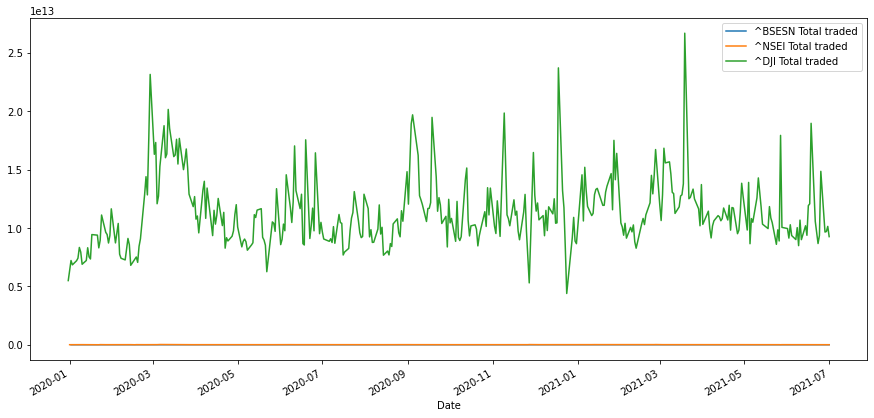

In [11]:
stock1['Total traded'].plot(label=finalb+' Total traded',figsize=(15,7))
stock2['Total traded'].plot(label=finalc+' Total traded ')
stock3['Total traded'].plot(label=finald+' Total traded')
plt.legend()
plt.ylabel
plt.savefig("totaltraded.jpg")

In [12]:

# Put your local file path 
fileName = r"totaltraded.jpg"
bucket = storage.bucket()
blob = bucket.blob("totaltraded")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL

blob.make_public()

print("your file url", blob.public_url)

your file url https://storage.googleapis.com/stock-data-fc41e.appspot.com/totaltraded


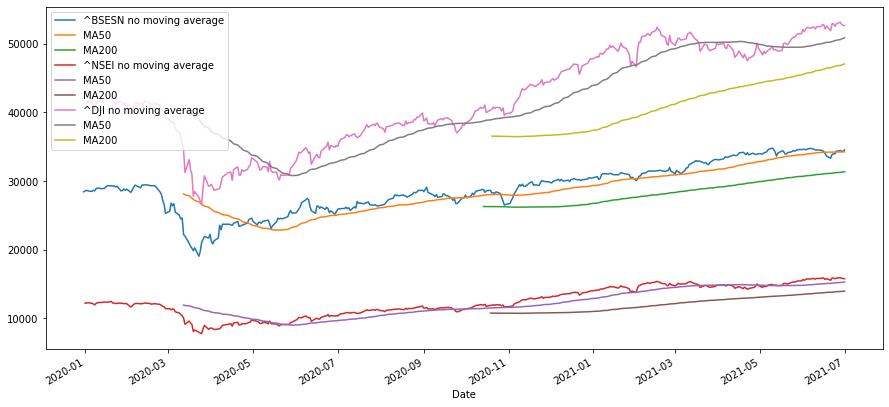

In [13]:
#moving average(to make data more reliable as the data in gm has a lot of up and down)
stock3['Open'].plot(label=finalb+' no moving average',figsize=(15,7))
stock3['MA50']=stock3['Open'].rolling(50).mean()#moving average
stock3['MA50'].plot(label='MA50')
stock3['MA200']=stock3['Open'].rolling(200).mean()#moving average
stock3['MA200'].plot(label='MA200')#when to high that is ma=200 then the up's and down's can't detect
stock2['Open'].plot(label=finalc+' no moving average',figsize=(15,7))
stock2['MA50']=stock2['Open'].rolling(50).mean()#moving average
stock2['MA50'].plot(label='MA50')
stock2['MA200']=stock2['Open'].rolling(200).mean()#moving average
stock2['MA200'].plot(label='MA200')#when to high that is ma=200 then the up's and down's can't detect
stock1['Open'].plot(label=finald+' no moving average',figsize=(15,7))
stock1['MA50']=stock1['Open'].rolling(50).mean()#moving average
stock1['MA50'].plot(label='MA50')
stock1['MA200']=stock1['Open'].rolling(200).mean()#moving average
stock1['MA200'].plot(label='MA200')#when to high that is ma=200 then the up's and down's can't detect
plt.legend()#we can use auto regression function for correcting these
plt.savefig("movingavg.jpg")

In [14]:

# Put your local file path 
fileName = r"movingavg.jpg"
bucket = storage.bucket()
blob = bucket.blob("movingavg")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()

print("your file url", blob.public_url)

your file url https://storage.googleapis.com/stock-data-fc41e.appspot.com/movingavg


In [15]:
#Daily Percentage change#helps to invest on dialy basis
stock1['returns']=(stock1['Close']/stock1['Close'].shift(1))-1
stock2['returns']=(stock2['Close']/stock2['Close'].shift(1))-1
stock3['returns']=(stock3['Close']/stock3['Close'].shift(1))-1

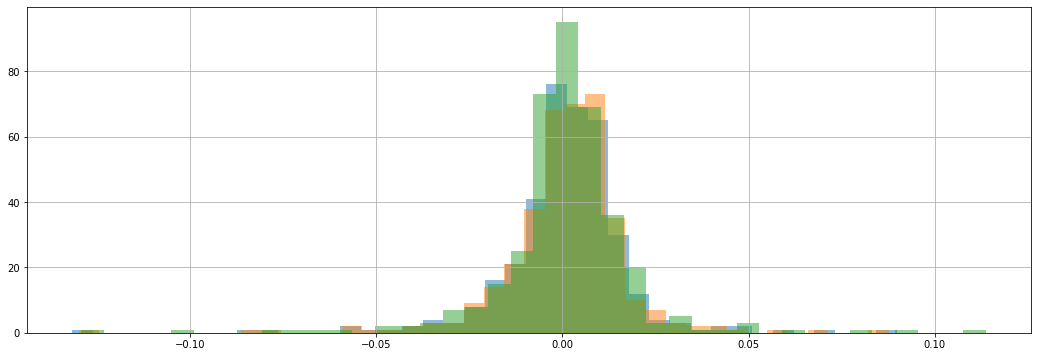

In [16]:
stock1['returns'].hist(bins=40,label=finalb+' Daily % change',alpha=0.5,figsize=(18,6))#alpha for transerency
stock2['returns'].hist(bins=40,label=finalc+' Daily % change',alpha=0.5)
stock3['returns'].hist(bins=40,label=finald+' Daily % change',alpha=0.5)
plt.savefig("Daily.jpg")

In [17]:

# Put your local file path 
fileName = r"Daily.jpg"
bucket = storage.bucket()
blob = bucket.blob("Daily")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()

print("your file url", blob.public_url)

your file url https://storage.googleapis.com/stock-data-fc41e.appspot.com/Daily


In [18]:
#cumulative return (for checking over a period returns instead of dialy)i(t)=(1+r(t))i(t-1)=(1+ (p(t)/p(t-1)) -1)i(t-1)=p(t)/p(t-1)*i(t-1)
stock1['Cummlative']=(1+stock1['returns']).cumprod()
stock2['Cummlative']=(1+stock2['returns']).cumprod()
stock3['Cummlative']=(1+stock3['returns']).cumprod()

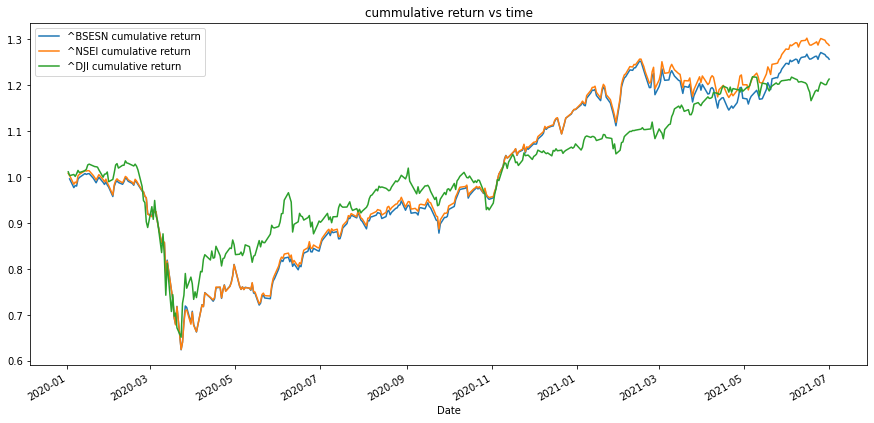

In [30]:
stock1['Cummlative'].plot(label=finalb+' cumulative return',figsize=(15,7))
stock2['Cummlative'].plot(label=finalc+' cumulative return')
stock3['Cummlative'].plot(label=finald+' cumulative return')
plt.title("cummulative return vs time")
plt.legend()
plt.savefig("Cummulative.jpg")

In [31]:

# Put your local file path 
fileName = r"Cummulative.jpg"
bucket = storage.bucket()
blob = bucket.blob("Cummulative")
blob.upload_from_filename(fileName)

# Opt : if you want to make public access from the URL
blob.make_public()

print("your file url", blob.public_url)

your file url https://storage.googleapis.com/stock-data-fc41e.appspot.com/Cummulative
